In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [33]:
df.shape

(13320, 9)

In [34]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [35]:
df2 = df.drop(["area_type", "society", "balcony", "availability"], axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [36]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [37]:
# drop the null column or fill the na values with median values
# dropping the data here
df3 = df2.dropna()
# this drops all rows having a null value
df3.isnull().sum()
# no rows will have any null value after this

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [38]:
# to check all unique values present in the size column
df3["size"].unique()
# since there are many weird size types we need to standardize them somehow

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [39]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Pranshu\AppData\Local\Temp\ipykernel_21156\540722847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [40]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [41]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [42]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [51]:
df3.total_sqft.unique()
df3 = df3.drop(["size"], axis="columns")

In [52]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [53]:
df3[df3["total_sqft"].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [54]:
# changing units of size and weird size values
def ret_avg(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        pass


# changing units of size
# faulty function, none is being returned
def unit_conversion(x):
    tokens = x.split()
    try:
        if len(tokens > 1):
            if tokens[1] == "Meter":
                return float(tokens[0]) * 10.764
    except:
        pass

In [47]:
ret_avg("2100-2400")

2250.0

In [55]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(ret_avg)
# df4["total_sqft"] = df4["total_sqft"].apply(unit_conversion)
df4.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


In [49]:
# print(unit_conversion('2100 Meter'))

Feature engineering and dimensionality reduction


In [56]:
df5 = df4.copy()  # doing a deep copy
# creating new feature price per sq ft to detect outliers

df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [58]:
len(df5.location.unique())
"""
    high dimensionality problem as there are 1304 columns and to represent each 
    uniquely we would need 1304 columns, which is tedious and impractical
"""

1304

In [62]:
# reducing dimensions
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = (
    df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
)

len(location_stats[location_stats <= 10])
# many locations have less than 10 samples so reducing those to others

1052

In [63]:
location_stats_less = location_stats[location_stats <= 10]
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less else x)
len(df5.location.unique())

242

Outlier detection and removal


In [64]:
# use stddev or domain knowledge
df5[df5.total_sqft / df5.bhk < 100].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
349,other,11.0,3.0,74.0,3,672727.272727
770,other,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,315.0,4.0,90.0,4,28571.428571


In [66]:
df5.shape

(13246, 6)

In [68]:
df6 = df5[~(df5.total_sqft / df5.bhk < 100)]
df6.shape

(13206, 6)

In [69]:
df6.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

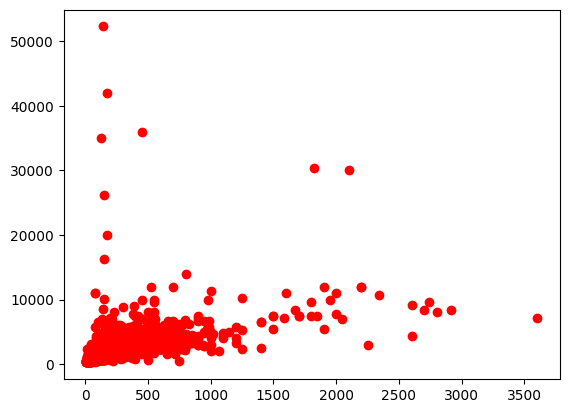

In [74]:
plt.scatter(df6.price, df6.total_sqft, color="red")